In [1]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.experimental.algorithms.mo_cma_es import MO_CMAES
from pymoo.factory import get_reference_directions
from pymoo.optimize import minimize
from pymoo.problems.multi import ZDT1, TNK
from pymoo.visualization.scatter import Scatter
from pysamoo.experimental.ParDen import ParDen

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
gaussian_process = GaussianProcessRegressor()

problem = ZDT1(n_var=10)

ref_dirs = get_reference_directions("das-dennis", 2, n_points=20)

# algorithm = NSGA2(pop_size=20, n_offsprings=10, ref_dirs=ref_dirs)

algorithm = MO_CMAES(mu=20, sigma=0.1, lambda_=10)

algorithm = ParDen(algorithm,
                   n_initial_doe=20,
                   surrogate=gaussian_process, 
                   twopoint0=True,
                   beta=10)

res = minimize(
    problem,
    algorithm,
    ('n_evals', 250),
    seed=1,
    verbose=True)

n_gen |  n_eval |     igd      |      gd      |      hv      | n_influenced |  nds_score   |   n_front   
    1 |      20 |  1.911750382 |  2.574224274 |  0.00000E+00 |            - |  0.392727935 |            5
    2 |      30 |  1.910986804 |  2.306817818 |  0.00000E+00 |        10/10 |  0.419572567 |            9
    3 |      40 |  1.357518097 |  1.627865854 |  0.00000E+00 |        10/10 |  0.511606373 |            5
    4 |      50 |  0.907656873 |  1.261467797 |  0.00000E+00 |        10/10 |  0.178005081 |            9
    5 |      60 |  0.655255002 |  1.139579799 |  0.033970177 |        10/10 |  0.468240663 |            8
    6 |      70 |  0.594312047 |  1.140259822 |  0.072077466 |        10/10 |  0.518155128 |           12
    7 |      80 |  0.350195346 |  0.572826031 |  0.208823422 |        10/10 |  0.582929335 |            5
    8 |      90 |  0.203138661 |  0.237158632 |  0.323406834 |        10/10 |  0.542097293 |            7
    9 |     100 |  0.112404274 |  0.040063039 

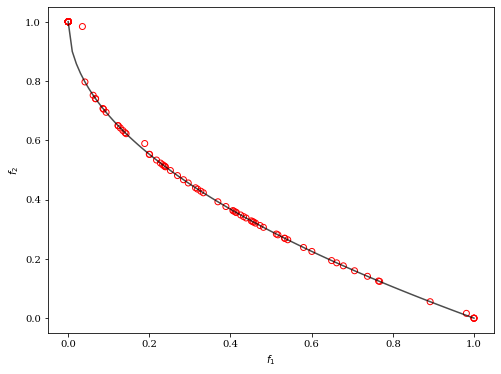

In [2]:
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [3]:
# algorithm.setup(problem, seed=2, termination=('n_evals', 250))

# for k in range(3):
#     algorithm.next()
    # print(algorithm.n_gen)

In [4]:
# res.F